# 퍼셉트론 테스트와 수렴정리Perceptron test and its convergence theorem  
<hr/>


이 문서에서는 퍼셉트론의 개념과 간단한 코딩 실습을 한 뒤 퍼셉트론의 수렴 정리에 대해 알아보겠습니다. 
많은 문서들에서 퍼셉트론의 작동 방식이나 훈련에 대해 언급하지만 퍼셉트론 수렴 정리에 대해서는 잘 언급하지 않습니다. 
크게 효용이 없어서 그런것일텐데 어쨌거나 알고 싶은 사람은 있을 수 있고, 
그럴 때 한글로 잘 정리된 볼 만한 문서가 없어서 이 문서를 작성하게 되었습니다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## 1. 퍼셉트론
<hr/>

### 1-1. 퍼셉트론 정의

<img src="perceptron.png"/>


우리의 입력을 받을 퍼셉트론은 위 그림과 같습니다. 입력 두개를 받아 각 입력에 할당된 웨이트 $w$를 곱한 다음 다 더한 가중합Weighted sum을 계산합니다.

$$h=\sum_{i=1}^{2} w_{i}x_{i}$$

그 값을 한번 더 활성화 함수에 넣어서 출력을 만들어 냅니다. 특정값 $\theta$보다 크면 1, 같거나 작으면 0을 출력하게 되고 우리는 $\theta=0$으로 두겠습니다.

$$ y\equiv a(h)=
\begin{cases}
1, & \mbox{if }h \gt 0 \\
0, & \mbox{if }h \le 0
\end{cases} $$

그래서 퍼셉트론의 출력은 위 식처럼 $y=a(\boldsymbol{w}\cdot \boldsymbol{x})$ 라는 간단한 선형 조합으로 결정됩니다.  
퍼셉트론이 원하는 출력을 바르게 내기 위해서는 가중치 $\boldsymbol{w}$를 업데이트하는 룰을 정해야 합니다. 기본적인 아이디어는 출력값 $y$가 타겟값 $t$ 보다 크면 (퍼셉트론의 출력은 0 또는 1 이므로 $y=1$, $t=0$이라는 말) 출력이 0 이 되도록하기 위해 가중합 $h$를 줄이는 것입니다. 이는 곧 $w$를 적당히 줄인다는 말입니다. 얼마만큼 줄이느냐하면 쉽게 그냥 $x$만큼 줄이면 됩니다.

$$ \boldsymbol{w}^{(j)} = \boldsymbol{w}^{(j-1)} - \boldsymbol{x}_{i}$$

하지만 이는 $h$를 줄여야하는 상황에서 $x$와 $w$가 양수인 경우에만 가능하기 때문에 모든 사항을 고려해서 가중치를 업데이트하기 위해서 아래처럼 해보기로 합니다.

$$w_{j}^{(t)} = w_{j}^{(t-1)} - \eta (y_{i} - t_{i})x_{ij}$$

또는

$$w_{j}^{(t)} = w_{j}^{(t-1)} + \eta (t_{i} - y_{i})x_{ij}$$

위 식에서, 

- $w_{j}^{t}$ : $t$번째 반복에 $\boldsymbol{w}$의 $j$번째 성분, 
- $y_{i}$, $t_{i}$: $\boldsymbol{x}_{i}$에 대한 출력과 타겟, 
- $x_{ij}$:$i$번째 $\boldsymbol{x}$의 $j$번째 성분

위 식에서 $\eta$는 1과 같거나 작은 양수로 한번 반복에 얼마씩 업데이트 될지 결정하는 상수입니다. $\eta$앞에 부호가 +, -인 두 경우로 업데이트 할 수 있는데 각 경우에 대해 구체적으로 생각해보겠습니다. 간단한 더하기, 빼기지만 부호가 햇갈리므로 정리를 해보겠습니다.

<table>
    <tr>
        <th>$w_{j}^{(t)}=w_{j}^{(t-1)}$</th>
        <th width="150">$-\eta(y_{i}-t_{i})$</th>
        <th width="40" style="text-align:center;">$x_{ij}$</th>
        <th style="text-align:left;">설명</th>
    </tr>
    <tr>
        <td>값 또는 부호</td>
        <td>$y_{i}=1$, $t_{i}=0$, $(y_{i}-t_{i})>0$</td>
        <td style="text-align:center;">+</td>
        <td style="text-align:left;">
        $h>0$ 라서 $y_{i}=1$이 되었고 $t_{i}=0$이므로 $h$를 감소 시켜야함.<br> $x_{ij}$가 양수인데 $h>0$ 라는 것은 지금 $w>0$라는 뜻이고 $h$를 감소시키기 위해서는 <br> $w$를 작게 해야함. 그래서 양수 $x_{ij}$를 뺌.
        </td>
    </tr>
    <tr>
        <td></td>
        <td>$y_{i}=0$, $t_{i}=1$, $(y_{i}-t_{i})<0$</td>
        <td style="text-align:center;">+</td>
        <td style="text-align:left;">$h\le0$ 라서 $y_{i}=0$이 되었고 $t_{i}=1$이므로 $h$를 증가 시켜야 함.<br> $x_{ij}$가 양수인데 $h\le0$ 라는 것은 지금 $w\le0$라는 뜻이고 $h$를 증가시키기 위해서는 <br> $w$를 크게 해야함. 그래서 양수 $x_{ij}$를 더함.
        </td>
    </tr>
    <tr>
        <td></td>
        <td>$y_{i}=1$, $t_{i}=0$, $(y_{i}-t_{i})>0$</td>
        <td style="text-align:center;">-</td>
        <td style="text-align:left;">$h>0$ 라서 $y_{i}=1$이 되었고 $t_{i}=0$이므로 $h$를 감소 시켜야 함.<br> $x_{ij}$가 음수인데 $h>0$ 라는 것은 지금 $w<0$라는 뜻이고 $h$를 감소시키기 위해서는 <br>$w$를 크게 해야함. 그래서 지금 -인 $w$에 $\left\vert x_{ij} \right\vert$를 더함.
        </td>
    </tr>
<tr>
    <td></td>
    <td>$y_{i}=0$, $t_{i}=1$, $(y_{i}-t_{i})<0$</td>
    <td style="text-align:center;">-</td>
    <td style="text-align:left;">$h\le0$ 라서 $y_{i}=0$이 되었고 $t_{i}=1$이므로 $h$를 증가 시켜야 함.<br> $x_{ij}$가 음수인데 $h\le0$ 라는 것은 지금 $w\ge0$라는 뜻이고 $h$를 증가시키기 위해서는 <br>$w$를 작게 해야함. 그래서 지금 +인 $w$에 $\left\vert x_{ij} \right\vert$를 뺌.
    </td>
</tr>
</table>

<table>
    <tr>
        <th>$w_{j}^{(t)}=w_{j}^{(t-1)}$</th>
        <th width="150">$+\eta(t_{i}-y_{i})$</th>
        <th width="40" style="text-align:center;">$x_{ij}$</th>
        <th style="text-align:left;">설명</th>
    </tr>
    <tr>
        <td>값 또는 부호</td>
        <td>$t_{i}=1$, $y_{i}=0$, $(t_{i}-y_{i})>0$</td>
        <td style="text-align:center;">+</td>
        <td style="text-align:left;">
        $h\le0$ 라서 $y_{i}=0$이 되었고 $t_{i}=1$이므로 $h$를 증가 시켜야함.<br> $x_{ij}$가 양수인데 $h\le0$ 라는 것은 지금 $w\le0$라는 뜻이고 $h$를 증가시키기 위해서는 <br>$w$를 크게 해야함. 그래서 양수 $x_{ij}$를 더함.
        </td>
    </tr>
    <tr>
        <td></td>
        <td>$t_{i}=0$, $y_{i}=1$, $(t_{i}-y_{i})<0$</td>
        <td style="text-align:center;">+</td>
        <td style="text-align:left;">$h>0$ 라서 $y_{i}=1$이 되었고 $t_{i}=0$이므로 $h$를 감소 시켜야함.<br> $x_{ij}$가 양수인데 $h>0$ 라는 것은 지금 $w>0$라는 뜻이고 $h$를 감소시키기 위해서는 <br> $w$를 작게 해야함. 그래서 양수 $x_{ij}$를 뺌.
        </td>
    </tr>
    <tr>
        <td></td>
        <td>$t_{i}=1$, $y_{i}=0$, $(t_{i}-y_{i})>0$</td>
        <td style="text-align:center;">-</td>
        <td style="text-align:left;">$h\le0$ 라서 $y_{i}=0$이 되었고 $t_{i}=1$이므로 $h$를 증가 시켜야함.<br> $x_{ij}$가 음수인데 $h\le0$ 라는 것은 지금 $w\ge0$라는 뜻이고 $h$를 증가시키기 위해서는 <br>$w$를 작게 해야함. 그래서 지금 +인 $w$에 $\left\vert x_{ij} \right\vert$를 뺌.
        </td>
    </tr>
<tr>
    <td></td>
    <td>$t_{i}=0$, $y_{i}=1$, $(t_{i}-y_{i})<0$</td>
    <td style="text-align:center;">-</td>
    <td style="text-align:left;">$h>0$ 라서 $y_{i}=1$이 되었고 $t_{i}=0$이므로 $h$를 감소 시켜야함.<br> $x_{ij}$가 음수인데 $h>0$ 라는 것은 지금 $w<0$라는 뜻이고 $h$를 감소시키기 위해서는 <br>$w$를 크게 해야함. 그래서 지금 -인 $w$에 $\left\vert x_{ij} \right\vert$를 더함.
    </td>
</tr>
</table>

이상의 정리처럼 +,- 방식의 업데이트 모두 가능합니다. 또 퍼셉트론의 활성화 값이 0, 1 이 아니라 -1, 1로 해도 $\eta$ 다음 ()의 부호가 활성화 값이 0,1 인 경우와 변함이 없으므로 문제가 없습니다. 책에 따라 둘중 하나를 쓰거나 가끔은 둘 다 혼용해서 사용하는 책도(이런 책의 저자는 도대체 무슨생각을 하는 걸까....) 있으므로 잘 정리를 해둬야 햇갈리지 않습니다. 이제 코드를 통해 확인해보도록 하겠습니다.


### 1-2. 퍼셉트론 실습

4개의 포인트를 입력받아서 적합한 값을 출력하는 퍼셉트론을 학습해봅니다. 입력은 아래 그림과 같고 결과적으로 이 분류는 논리적 OR를 나타냅니다. 즉, 붉은색 점만 결과가 0이고 나머지 파란 점은 모두 출력이 1이 되는 퍼셉트론을 만드는것이 목표입니다.


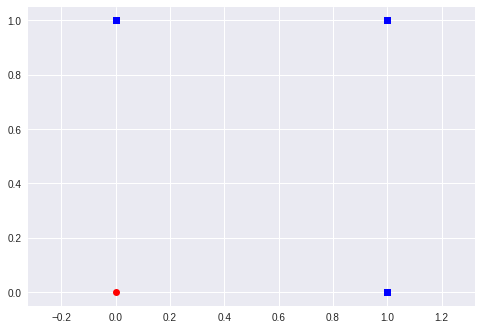

In [2]:
mpl.style.use('seaborn')

plt.plot([0], [0], 'ro')
plt.plot([1,0,1], [0,1,1], 'bs')
plt.axis('equal')
plt.show()

In [3]:
#입력 행렬을 만든다. [4x2]의 행렬이며 한 행은 하나의 데이터를 나타낸다.
X = np.array([0,0,1,0,0,1,1,1]).reshape(4,2)

#각 입력의 타겟을 [4x1]의 열벡터로 만든다.
T = np.array([0,1,1,1]).reshape(4,1)
print("Input is")
print("{} shape:{}".format(X, X.shape))

print("Target is ")
print("{} shape:{}".format(T, T.shape))

Input is
[[0 0]
 [1 0]
 [0 1]
 [1 1]] shape:(4, 2)
Target is 
[[0]
 [1]
 [1]
 [1]] shape:(4, 1)


In [4]:
np.random.seed(0)
W_hsty = []
W = -np.random.rand(2).reshape(1,2)
Y = np.where(np.dot(W,X.T).T>0, 1, 0) #forward

#최초 초기 상태를 출력한다.
print("UPDATE 0 : W={:+f}, {:+f}, Y={},{},{},{}".format(W[0][0], W[0][1], 
                                                        Y[0][0], Y[1][0], Y[2][0], Y[3][0]))

#10번 반복한다.
for i in range(10):
    #eta는 반복이 좀 되면서 수렴하게 만들기 위해 적당히 작은 값으로 함
    W += 0.1*np.dot((T-Y).T,X)           #W -= 0.15*np.dot((Y-T).T,X) #두경우 모두 가능함
    W_hsty.append(W.copy())               #그림 그리기 위해서 w를 저장
    Y = np.where(np.dot(W,X.T).T > 0, 1, 0) #forward
    print("UPDATE {} : W={:+f}, {:+f}, Y={},{},{},{}".format(i+1, W[0][0],W[0][1], 
                                                                  Y[0][0], Y[1][0], Y[2][0], Y[3][0]))
    if (T-Y).sum() == 0 : break #출력과 타겟이 동일하면 멈춤

UPDATE 0 : W=-0.548814, -0.715189, Y=0,0,0,0
UPDATE 1 : W=-0.348814, -0.515189, Y=0,0,0,0
UPDATE 2 : W=-0.148814, -0.315189, Y=0,0,0,0
UPDATE 3 : W=+0.051186, -0.115189, Y=0,1,0,0
UPDATE 4 : W=+0.151186, +0.084811, Y=0,1,1,1


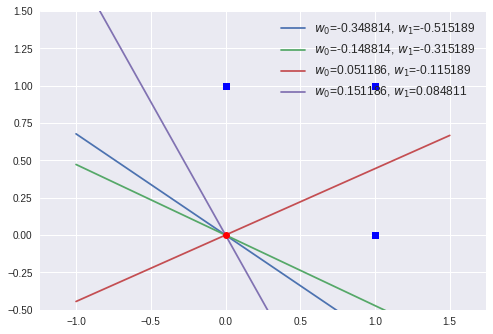

In [5]:
x = np.arange(-1, 2, 0.5);

y1 = (-W_hsty[0][0][0])/W_hsty[0][0][1] * x 
y2 = (-W_hsty[1][0][0])/W_hsty[1][0][1] * x
y3 = (-W_hsty[2][0][0])/W_hsty[2][0][1] * x
y4 = (-W_hsty[3][0][0])/W_hsty[3][0][1] * x
plt.plot(x, y1, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[0][0][0], W_hsty[0][0][1])) 
plt.plot(x, y2, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[1][0][0], W_hsty[1][0][1])) 
plt.plot(x, y3, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[2][0][0], W_hsty[2][0][1]))  
plt.plot(x, y4, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[3][0][0], W_hsty[3][0][1])) 

plt.plot([0], [0], 'ro')
plt.plot([1,0,1], [0,1,1], 'bs')
plt.axis('equal')
plt.axis([-1, 1.5, -0.5, 1.5])
legend = plt.legend(loc='upper right', shadow=True, fontsize=12)

plt.show()

위 그림처럼 결정 경계는 4번 업데이트 되면서 최종 $w_0$=0.151186, $w_1$=0.084811에서 멈추었습니다. 이 상태에서 퍼셉트론에 파란 사각형 좌표가 입력되면 1이 출력되고, 빨간동그라미 좌표가 입력되면 0이 출력되게 되었습니다. 
이제 좀 더 일반적인 예제를 살펴보겠습니다. 아래과 같이 임의의 점 4개가 있을때 이를 2개의 클래스로 분류하는 문제입니다.


Input is
[[ 1  8]
 [ 4 11]
 [ 5  2]
 [ 7  6]] shape:(4, 2)
Target is 
[[1]
 [1]
 [0]
 [0]] shape:(4, 1)


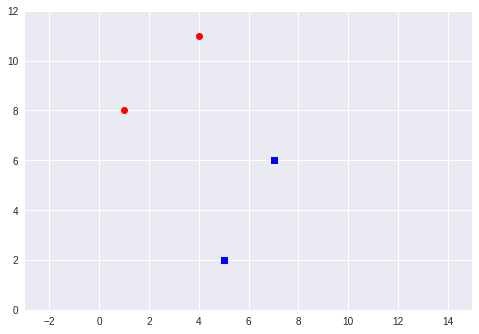

In [6]:
X = np.array([1,8,4,11,5,2,7,6]).reshape(4,2)
T = np.array([1,1,0,0]).reshape(4,1)
print("Input is")
print("{} shape:{}".format(X, X.shape))

print("Target is ")
print("{} shape:{}".format(T, T.shape))

plt.plot([1,4], [8,11], 'ro')
plt.plot([5,7], [2,6], 'bs')
plt.axis('equal')
plt.axis([0, 12, 0, 12])
plt.show()


다시 한번 위의 퍼셉트론 코드를 반복하도록 하겠습니다.


In [7]:
np.random.seed(0)
W_hsty = []
W = -np.random.rand(2).reshape(1,2)
Y = np.where(np.dot(W,X.T).T>0, 1, 0)
print("UPDATE 0 : W={:+f}, {:+f}, Y={},{},{},{}".format(W[0][0],W[0][1], 
                                                        Y[0][0], Y[1][0], Y[2][0], Y[3][0]))

for i in range(10):
    #eta는 반복이 좀 되면서 수렴하게 만들기 위해 적당히 작은 값으로 함
    W += 0.01*np.dot((T-Y).T,X) #W -= 0.15*np.dot((Y-T).T,X)
    W_hsty.append(W.copy()) #그림 그리기 위해서 w를 저장
    Y = np.where(np.dot(W,X.T).T>0, 1, 0) #forward
    print("UPDATE {} : W={:+f}, {:+f}, Y={},{},{},{}".format(i+1, W[0][0],W[0][1], 
                                                             Y[0][0], Y[1][0], Y[2][0], Y[3][0]))
    
    if (T-Y).sum() == 0 : break

UPDATE 0 : W=-0.548814, -0.715189, Y=0,0,0,0
UPDATE 1 : W=-0.498814, -0.525189, Y=0,0,0,0
UPDATE 2 : W=-0.448814, -0.335189, Y=0,0,0,0
UPDATE 3 : W=-0.398814, -0.145189, Y=0,0,0,0
UPDATE 4 : W=-0.348814, +0.044811, Y=1,0,0,0
UPDATE 5 : W=-0.308814, +0.154811, Y=1,1,0,0


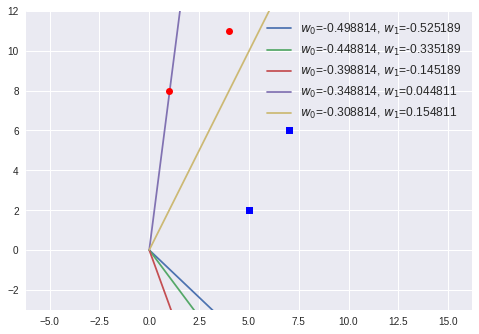

In [8]:
x = np.arange(0, 10, 0.5);

y1 = (-W_hsty[0][0][0])/W_hsty[0][0][1] * x
y2 = (-W_hsty[1][0][0])/W_hsty[1][0][1] * x
y3 = (-W_hsty[2][0][0])/W_hsty[2][0][1] * x
y4 = (-W_hsty[3][0][0])/W_hsty[3][0][1] * x
y5 = (-W_hsty[4][0][0])/W_hsty[4][0][1] * x

plt.plot(x, y1, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[0][0][0], W_hsty[0][0][1]))  
plt.plot(x, y2, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[1][0][0], W_hsty[1][0][1])) 
plt.plot(x, y3, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[2][0][0], W_hsty[2][0][1]))  
plt.plot(x, y4, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[3][0][0], W_hsty[3][0][1]))  
plt.plot(x, y5, label=r"$w_0$={:f}, $w_1$={:f}".format(W_hsty[4][0][0], W_hsty[4][0][1])) 
legend = plt.legend(loc='upper right', shadow=True, fontsize=12)

plt.plot([1,4], [8,11], 'ro')
plt.plot([5,7], [2,6], 'bs')
plt.axis('equal')
plt.axis([0, 10, -3, 12])
plt.show()



큰 문제없이 5번 반복에 결정 경계를 찾아내었습니다. 그렇다면 선형 분리 가능한 데이터라면 항상 이런식으로 결정경계를 찾아낼 수 있을지 궁금해집니다. 이에 대한 증명이 퍼센트론 수렴정리입니다. 지금부터 퍼셉트론 수렴정리에 대해서 알아보도록 하겠습니다.

## 2. 퍼셉트론 수렴정리
<hr/>

퍼셉트론 수렴정리를 이야기하기전에 퍼셉트론의 활성화를 아래처럼 다시 정의하도록 하겠습니다.

$$ y\equiv a(h)=
\begin{cases}
1, & \mbox{if }h \gt 0 \\
-1, & \mbox{if }h \le 0
\end{cases} $$

위 테이블에서 확인했듯이 활성화 값을 -1, 1로 해도 문제가 없습니다. 아래 예제에서는 -1, 1로 하고 동작을 확인하도록 하겠습니다.

퍼셉트론의 수렴정리는 다음과 같습니다.

><b style="color:#FF0000">Theorem</b>. Assume that there exists some parameter vector $\boldsymbol{w}^{*}$ such that $\lVert\boldsymbol{w}^{*}\rVert=1$ , and some $\gamma>0$ such that for all $k=1 ... n$, $y_{k}(\boldsymbol{w}^{*} \cdot \boldsymbol{x}_{k}) \ge \gamma$ Assume in addition that for all $k=1 ... n$, $\lVert\boldsymbol{x}_{k}\rVert\le R$, Then the perceptron algorithm makes at most $\frac{R^{2}}{\gamma^{2}}$ errors.(The definition of an error is as follows: an error occurs whenever we have $y'_{k} \ne y_{k}$ in the algorithm.)  

영어로 적어 놓으니 무시무시합니다. 먼소린지...잘 모르겠는데 우리말로 바꿔 적어보면 다음과 같습니다.

><b style="color:#FF0000">정리</b>. $\lVert\boldsymbol{w}^{*}\rVert=1$ 인 어떤 계수벡터 $\boldsymbol{w}^{*}$ 가 있고, 모든 $k=1 ... n$에 대해 $y_{k}(\boldsymbol{x}_{k} \cdot \boldsymbol{w}^{*}) \ge \gamma$를 만족시키는 $\gamma>0$ 가 있다하자. 그리고, 모든 $k=1 ... n$에 대해 $\lVert\boldsymbol{x}_{k}\rVert\le R$ 이면, 퍼셉트론 알고리즘은 많아야 $\frac{R^{2}}{\gamma^{2}}$번 에러를 만든다.(에러란 알고리즘에서 $y'_{k} \ne y_{k}$ 인 경우가 발생한 것을 의미, 여기서 $y_{k}$는 타겟값, $y'_{k}$는 출력값)

한 줄씩 풀어서 정리를 좀 이해한 다음 증명을 하도록하겠습니다.

<img src="fig1.png" width="500">

위 그림에서 임의의 $\boldsymbol{w}$의해 결정되는 결정 경계(붉은색 라인)은 2차원에 존재하는 평면의 윤곽선입니다. 현재 문제의 도메인이 2차원입니다. 가로축을 $x_{1}$, 세로축을 $x_{2}$라 하겠습니다. 그럼 아래식처럼 $\boldsymbol{w}$를 계수로 하는 함수를 생각 해볼 수 있습니다.

$$f(x_{1}, x_{2})= \boldsymbol{w} \cdot \boldsymbol{x} = w_{1}x_{1} + w_{2}x_{2}$$

위 함수는 2변수 스칼라 함수로 $x_{1}x_{2}$ 평면을 도메인으로하고 이 평면에 수직인 $f$축을 함수 값으로 하는 평면이 됩니다. 이런 평면과 $f=0$ 인 수평면 다시말해, 함수의 높이가 0인 곳에 위치하는 수평면과의 교차선이 하나 존재하는데 그것이 바로 그림의 붉은 라인이 되는 것입니다. 다르게 말해보면 평면 위의 모든 점들중에 함수값이 0인 점만 다 모은 것입니다. 그렇다면 $f=1$인 곳에 위치하는 즉, 약간 더 높은 곳에 위치하는 평면과의 교차선을 $x_{1}x_{2}$ 평면에다 그려볼 수 있을 것입니다. 그림에서 파란선입니다. $f=-1$인 곳에 위치하는 평면과의 교차선도 그려볼 수 있습니다. 그림에서 노란선입니다. 이런 선들은 그 선상에서 $f$의 값이 모두 일치하게 되는데 이런 라인을 Iso-cost line이라고 합니다. 우리말로 등가선 정도 되겠습니다. 퍼셉트론은 이렇게 직선(2차원의 경우)의 계수 $\boldsymbol{w}$를 찾는 것입니다. 이 후에는 $\boldsymbol{w} \cdot \boldsymbol{x}>0$ 이면 직선 위쪽, $\boldsymbol{w} \cdot \boldsymbol{x}<0$ 이면 직선의 아래쪽에 점이 있다고 판별할 수 있습니다. 그래서 어떤 임의의 계수벡터 $\boldsymbol{w}^{*}$ 가 있는데 그 벡터를 사용해서 $y_{k}(\boldsymbol{w}^{*} \cdot \boldsymbol{x}_{k}) \ge \gamma$를 만족시키는 $\gamma>0$ 가 있다는 말은 $\boldsymbol{w}^{*}$가 점을 제대로 2개의 클래스로 선형분리 하고 있다는 말이 됩니다. 퍼셉트론에 입력되는 분리해야할 데이터의 타겟값 $t_k$를 한쪽 클래스는 1, 다른쪽 클래스는 -1로 설정하고 제대로 선형분리하는 $\boldsymbol{w}^{*}$를 찾았다면 $y_{k}(\boldsymbol{w}^{*}\cdot \boldsymbol{x}_{k} )$ 는 항상 양수가 되기 때문입니다. 그 모든 결과값들 중 제일 작은값이 결정경계와 가장 가깝게있는 점과의 거리가 될 것입니다. 그래서 $\gamma$는 커봤자 결정경계와의 최소거리가 되는 양수입니다. 그리고 입력 데이터 $\boldsymbol{x}$의 크기보다 큰 양수 $R$을 설정할 수 있습니다. 여기까지가 정리의 조건입니다. 이 조건을 만족시키면 즉, 데이터가 선형 분리 가능하고, $\gamma$, $R$이 존재하면 알고리즘은 $\frac{R^{2}}{\gamma^{2}}$번 틀리기전에 데이터를 선형 분리하는 결정경계의 계수 벡터 $\boldsymbol{w}^*$를 찾는다는 것이 정리 내용입니다. 

<b style="color:#FF0000">증명</b> 선형 분리가 가능하다고 했으므로 $\boldsymbol{w}^{*}$가 존재합니다. 퍼셉트론은 반복을 하면서 $\boldsymbol{w}^{*}$와 같은 방향의 벡터를 찾으려고 할 것입니다. 찾고싶은 $\boldsymbol{w}^{*}$와 퍼셉트론이 계속 업데이트하는 $\boldsymbol{w}^{(t)}$ 가 평행하다면 두 벡터의 사이각이 0이 되어 $\boldsymbol{w}^{*} \cdot \boldsymbol{w}^{(t)}$ 값이 최대가 될 것입니다. 따라서 매 업데이트 마다 내적값이 증가함을 보이면 알고리즘이 수렴하고 있다는 것을 보이는 것이 됩니다. 단 이때 두 벡터의 각도가 줄어서 내적이 증가하는게 아니라 $\boldsymbol{w}^{(t)}$의 크기가 커져서 내적값이 증가할 수 있으므로 $\boldsymbol{w}^{(t)}$의 크기 상한값도 함께 보여야 수렴한다고 이야기할 수 있습니다.

만약 $t$번째 반복에서 타겟이 $y$인 어떤 데이터 $\boldsymbol{x}$에 대해 $y(\boldsymbol{w}^{(t-1)}\cdot \boldsymbol{x})<0$이 되었다면 퍼셉트론은 에러를 발생 시킨 것이고 $\boldsymbol{w}^{(t-1)}$은 적당히 업데이트 되어야 합니다. 우리는 퍼셉트론이 $w_{j}^{(t)} = w_{j}^{(t-1)} + \eta (t_{i} - y_{i})x_{ij}$ 처럼 업데이트 될 수 있음을 앞에서 확인해보았습니다. 이 식에서  $\eta=1$, 타겟값을 {-1,1}로 두고, 이미 에러가 발생했으므로 퍼셉트론의 출력 $y_{i}$를 없애버린 $w_{j}^{(t)} = w_{j}^{(t-1)} + t_{i}x_{ij}$로도 업데이트를 할 수 있습니다. 업데이트가 필요하다면 $(t_{i}-y_{i})$의 양보다는 부호가 중요하기 때문에(어차피 $(t_{i}-y_{i})$값은 0, -2, 2 중하나) 업데이트되는 양은 달라지겠지만 부호는 일치하여 로직에는 아무 문제가 없습니다. 따라서 $t$번째 가중치를 $\boldsymbol{w}^{(t)} = \boldsymbol{w}^{(t-1)} + y\boldsymbol{x}$로 업데이트 할 수 있습니다. (<b style="color:#FF0000">주의</b>지금 증명에서는 문자 $t$를 알고리즘의 반복 번수로 나타내므로 타겟을 나타내는 문자로 $t$를 쓰지않고 $y$를 쓰고 있음.) 그리고 아래와 같이 계산할 수 있습니다.

$$
\begin{align}
\boldsymbol{w}^*\cdot \boldsymbol{w}^{(t)} 
    &= \boldsymbol{w}^* \cdot \left( \boldsymbol{w}^{(t-1)} +y \boldsymbol{x} \right) \\
    &= \boldsymbol{w}^{*} \cdot \boldsymbol{w}^{(t-1)} + y \boldsymbol{w}^* \cdot \boldsymbol{x} \\
    &\ge \boldsymbol{w}^{*} \cdot \boldsymbol{w}^{(t-1)} + \gamma \qquad \qquad (\because y(\boldsymbol{w}^{*} \cdot \boldsymbol{x}) \ge \gamma)
\end{align}
$$

위 식의 의미는 $\boldsymbol{w}^*\cdot \boldsymbol{w}^{(t)}$가 $\boldsymbol{w}^{*} \cdot \boldsymbol{w}^{(t-1)}$보다 적어도 $\gamma$만큼은 더 크다는 말이 됩니다. $\gamma$는 조건에 의해 양수이므로 $\boldsymbol{w}^{(t)}$가 업데이트 되어감에 따라 찾고자하는 $\boldsymbol{w}^{*}$와 $\boldsymbol{w}^{(t)}$의 내적이 증가함을 보였습니다. 그리고 한번 업데이트 될때 적어도 $\gamma$만큼 내적값이 증가하고, 초기 가중치 벡터에 대해 $\lVert \boldsymbol{w}^0 \rVert=0$인 초기 조건을 도입하면 $t$번 반복후에는 $\boldsymbol{w}^*\cdot \boldsymbol{w}^{(t)} \ge t\gamma$ 임을 알 수 있습니다.  코시-슈바르츠 부등식에 의해 $ \boldsymbol{w}^* \cdot \boldsymbol{w}^{(t)} \le \lVert \boldsymbol{w}^* \rVert  \lVert \boldsymbol{w}^{(t)} \rVert $ 이며, $\lVert \boldsymbol{w}^* \rVert=1$ 이므로 $\lVert \boldsymbol{w}^{(t)} \rVert \ge t \gamma$ 입니다. 이것이 $\lVert \boldsymbol{w}^{(t)} \rVert$의 하한이됩니다. 이제 $\lVert \boldsymbol{w}^{(t)} \rVert$의 상한을 보일 차례입니다. $t$ 반복이후 가중치 벡터의 길이는 다음과 같습니다.

$$
\begin{align}
\lVert \boldsymbol{w}^{(t)} \rVert ^{2} 
    &= \lVert \boldsymbol{w^{(t-1)}} + y \boldsymbol{x} \rVert^{2} \\
    &= \lVert \boldsymbol{w^{(t-1)}} \rVert^{2} + y^2 \lVert \boldsymbol{x} \rVert^2 + 2 y \boldsymbol{w}^{(t-1)} \cdot \boldsymbol{x} \\
    &\le \lVert \boldsymbol{w^{(t-1)}} \rVert^{2} + R^2
\end{align}
$$

두번째 식에서 $y$는 -1 아니면 1이므로 $y^2 = 1$이고 $\lVert \boldsymbol{x} \rVert^2 \le R^2$ 입니다. 그리고 $y \boldsymbol{w}^{(t-1)} \cdot \boldsymbol{x} <0$ 이므로 마지막줄이 유도됩니다. 초기 가중치 벡터에 대해 $\lVert \boldsymbol{w}^0 \rVert=0$인 초기 조건을 도입하면 $t$ 반복이후

$$ \lVert \boldsymbol{w}^{(t)} \rVert ^{2} \le tR^2  $$

라는 결과를 이끌어 낼 수 있습니다. 상한과 하한의 부등식을 함께 쓰면 다음과 같습니다.

$$ t^2 \gamma^2 \le \lVert \boldsymbol{w}^{(t)} \rVert^{2} \le tR^2$$ 

부등식을 정리하면 다음과 같은 결과를 얻습니다.

$$ t \le \frac{R^2}{\gamma^2}$$

이 말은 알고리즘의 반복 번수 $t$는 $\frac{R^2}{\gamma^2}$를 넘지않는다. 다시말하면 선형분리 가능한 데이터에 $\eta=1$, $\lVert \boldsymbol{w}^0 \rVert = 0$인 초기조건으로 알고리즘을 적용하면 알고리즘은 많아야 $\frac{R^2}{\gamma^2}$번 에러를 발생시킨다는 말이 됩니다.


위 결과는 분류해야하는 클래스간 거리가 가까울 수 록 알고리즘의 반복은 늘어나지만 수렴은 한다는 것을 말해줍니다. 실험을 해보기위해 이전의 예에서 두번째 점을 $\boldsymbol{x}_{2}=(6.8, 6.3)$으로 3번째 점과 매우 가깝게 이동시킵니다. 그리고 같은 코드를 반복합니다.


Input is
[[ 1.   8. ]
 [ 6.8  6.3]
 [ 5.   2. ]
 [ 7.   6. ]] shape:(4, 2)
Target is 
[[ 1]
 [ 1]
 [-1]
 [-1]] shape:(4, 1)


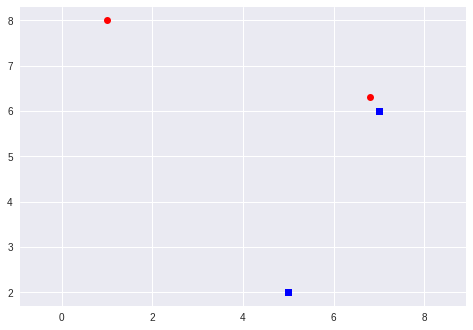

UPDATE   0 : W=+0.000000, +0.000000, Y=-1,-1,-1,-1
UPDATE   1 : W=+15.600000, +28.600000, Y=+1,+1,+1,+1
UPDATE   2 : W=-8.400000, +12.600000, Y=+1,+1,-1,+1
UPDATE   3 : W=-22.400000, +0.600000, Y=-1,-1,-1,-1
UPDATE   4 : W=-6.800000, +29.200000, Y=+1,+1,+1,+1
UPDATE   5 : W=-30.800000, +13.200000, Y=+1,-1,-1,-1
UPDATE   6 : W=-17.200000, +25.800000, Y=+1,+1,-1,+1
UPDATE   7 : W=-31.200000, +13.800000, Y=+1,-1,-1,-1
UPDATE   8 : W=-17.600000, +26.400000, Y=+1,+1,-1,+1
UPDATE   9 : W=-31.600000, +14.400000, Y=+1,-1,-1,-1
UPDATE  10 : W=-18.000000, +27.000000, Y=+1,+1,-1,+1
UPDATE  11 : W=-32.000000, +15.000000, Y=+1,-1,-1,-1
UPDATE  12 : W=-18.400000, +27.600000, Y=+1,+1,-1,+1
UPDATE  13 : W=-32.400000, +15.600000, Y=+1,-1,-1,-1
UPDATE  14 : W=-18.800000, +28.200000, Y=+1,+1,-1,+1
UPDATE  15 : W=-32.800000, +16.200000, Y=+1,-1,-1,-1
UPDATE  16 : W=-19.200000, +28.800000, Y=+1,+1,-1,+1
UPDATE  17 : W=-33.200000, +16.800000, Y=+1,-1,-1,-1
UPDATE  18 : W=-19.600000, +29.400000, Y=+1,+1,-1,+

In [9]:
X = np.array([1,8,6.8,6.3,5,2,7,6]).reshape(4,2)
T = np.array([1,1,-1,-1]).reshape(4,1) #클래스의 타켓을 -1,1로 설정
print("Input is")
print("{} shape:{}".format(X, X.shape))

print("Target is ")
print("{} shape:{}".format(T, T.shape))

plt.plot([1,6.8], [8,6.3], 'ro')
plt.plot([5,7], [2,6], 'bs')
plt.axis('equal')

plt.show()

W_hsty = []
#W = -np.random.rand(2).reshape(1,2)
W = np.array([0.,0.]).reshape(1,2) #증명처럼 초기값으로 [0,0]을 설정
Y = np.where(np.dot(W,X.T).T>0, 1, -1) #퍼셉트론의 출력을 -1, 1로 설정
print("UPDATE   0 : W={:+f}, {:+f}, Y={:+d},{:+d},{:+d},{:+d}".format(W[0][0],W[0][1], 
                                                        Y[0][0], Y[1][0], Y[2][0], Y[3][0]))

for i in range(1000):
    W += np.dot((T-Y).T,X)  #정리의 증명에 학습률 eta를 1로 두었으므로 여기서도 1로 함
    W_hsty.append(W.copy()) #그림 그리기 위해서 w를 저장
    Y = np.where(np.dot(W,X.T).T>0, 1, -1) 
    print("UPDATE {:3d} : W={:+f}, {:+f}, Y={:+d},{:+d},{:+d},{:+d}".format(i+1, W[0][0],W[0][1], 
                                                             Y[0][0], Y[1][0], Y[2][0], Y[3][0]))
    
    if (T-Y).sum() == 0 : break

245번째 업데이트에 타겟값 [1,1,-1,-1]에 수렴하였습니다. 그림을 아래처럼 그려보면 결정경계가 잘 형성됨을 알 수 있습니다. 두번째 점이 경계위에 있는것처럼 보이는데 확대해서 그려보면 점에 결정경계의 +영역에 있음을 알 수 있습니다. 점과 점사이를 가깝게 만드니 꽤 많이 해매다가 답을 찾아내는것을 알 수 있었습니다.


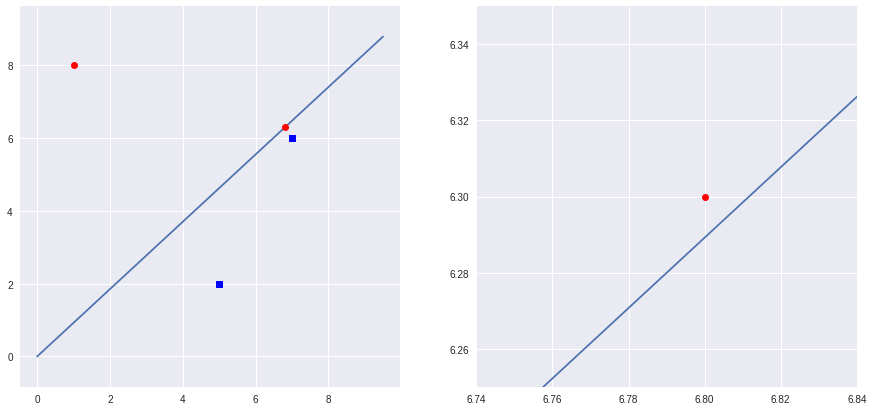

In [10]:
x = np.arange(0, 10, 0.5);
y = (-W_hsty[-1][0][0])/W_hsty[-1][0][1] * x

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y)
ax1.plot([1,6.8], [8,6.3], 'ro')
ax1.plot([5,7], [2,6], 'bs')
ax1.axis('equal')

ax2.plot(x, y)
ax2.plot([1,6.8], [8,6.3], 'ro')
ax2.plot([5,7], [2,6], 'bs')
ax2.axis([6.74, 6.84, 6.25, 6.35])

plt.show()

## 3. 참고문헌
<hr/>

1. 알고리즘 중심의 머신러닝 가이드Machine Learning: An Algorithmic Perspective, 2nd ed., 스티븐 마슬랜드  

2. http://www.cs.columbia.edu/~mcollins/courses/6998-2012/notes/perc.converge.pdf

In [1]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='http://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='http://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    p  { font-family: 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    li > p { text-indent: 0px; }
    code, pre { font-family: 'Nanum Gothic Coding' !important; }
    
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
</style>